In [1]:
import pandas as pd
import numpy as np
import json

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import spotipy
import spotipy.util as util 
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

%matplotlib inline

# Exploratory Data Analysis

In [2]:
data = pd.read_csv('tracks.csv')

In [3]:
data.describe()

,popularity,liked,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4.604000e+03,4604.000000
mean,34.140747,0.575804,0.572019,0.682415,5.377498,-7.195195,0.627063,0.098324,0.190657,0.134402,0.210420,0.457417,123.319279,2.302840e+05,3.938532
std,22.050230,0.494274,0.178464,0.216726,3.564066,3.756717,0.483638,0.099570,0.256449,0.283819,0.181956,0.255883,29.526164,7.696364e+04,0.339200
min,0.000000,0.000000,0.000000,0.006050,0.000000,-38.382000,0.000000,0.000000,0.000001,0.000000,0.016800,0.000000,0.000000,2.166700e+04,0.000000
25%,13.000000,0.000000,0.459750,0.544000,2.000000,-8.517000,0.000000,0.036575,0.006683,0.000000,0.097900,0.247000,99.963000,1.890665e+05,4.000000
50%,35.000000,1.000000,0.586000,0.709000,6.000000,-6.502000,1.000000,0.054100,0.063350,0.000042,0.135000,0.447000,122.960000,2.189865e+05,4.000000
75%,52.000000,1.000000,0.703250,0.852000,9.000000,-4.765000,1.000000,0.118000,0.285000,0.027300,0.273000,0.651250,141.335000,2.589902e+05,4.000000
max,93.000000,1.000000,0.979000,0.999000,11.000000,-0.734000,1.000000,0.862000,0.996000,0.993000,0.993000,0.993000,239.817000,1.412451e+06,5.000000


In [4]:
train, test = train_test_split(data, test_size=0.15)

In [5]:
print(f'Training Size: {len(train)} Testing Size: {len(test)}')

Training Size: 3913 Testing Size: 691


In [6]:
fig = plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

In [7]:
colors = ['#4f6ce0', '#db3535']
palette = sns.color_palette(colors)
sns.set_palette(palette)
sns.set_style('white')

In [8]:
pos_popularity = data[data['liked'] == 1]['popularity']
neg_popularity = data[data['liked'] == 0]['popularity']

pos_danceability = data[data['liked'] == 1]['danceability']
neg_danceability = data[data['liked'] == 0]['danceability']

pos_energy = data[data['liked'] == 1]['energy']
neg_energy = data[data['liked'] == 0]['energy']

pos_key = data[data['liked'] == 1]['key']
neg_key = data[data['liked'] == 0]['key']

pos_loudness = data[data['liked'] == 1]['loudness']
neg_loudness = data[data['liked'] == 0]['loudness']

pos_mode = data[data['liked'] == 1]['mode']
neg_mode = data[data['liked'] == 0]['mode']

pos_speechiness = data[data['liked'] == 1]['speechiness']
neg_speechiness = data[data['liked'] == 0]['speechiness']

pos_acousticness = data[data['liked'] == 1]['acousticness']
neg_acousticness = data[data['liked'] == 0]['acousticness']

pos_instrumentalness = data[data['liked'] == 1]['instrumentalness']
neg_instrumentalness = data[data['liked'] == 0]['instrumentalness']

pos_liveness = data[data['liked'] == 1]['liveness']
neg_liveness = data[data['liked'] == 0]['liveness']

pos_valence = data[data['liked'] == 1]['valence']
neg_valence = data[data['liked'] == 0]['valence']

pos_tempo = data[data['liked'] == 1]['tempo']
neg_tempo = data[data['liked'] == 0]['tempo']

pos_duration_ms = data[data['liked'] == 1]['duration_ms']
neg_duration_ms = data[data['liked'] == 0]['duration_ms']

pos_time_signature = data[data['liked'] == 1]['time_signature']
neg_time_signature = data[data['liked'] == 0]['time_signature']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previou

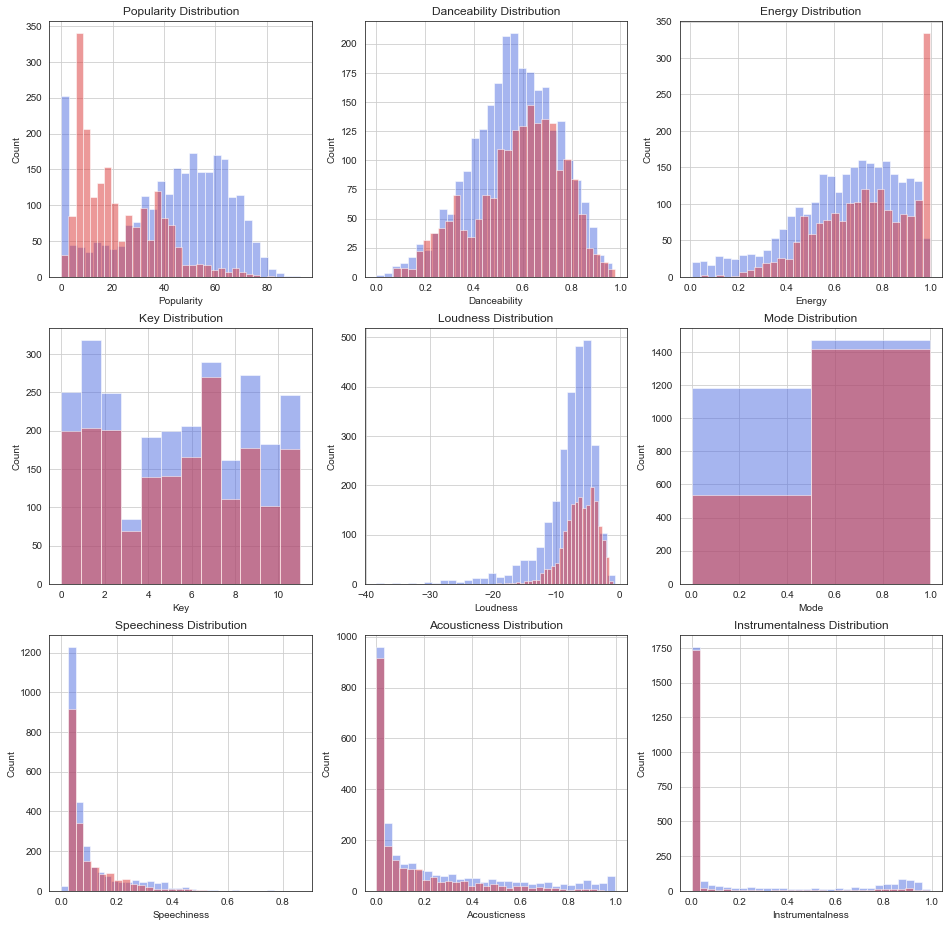

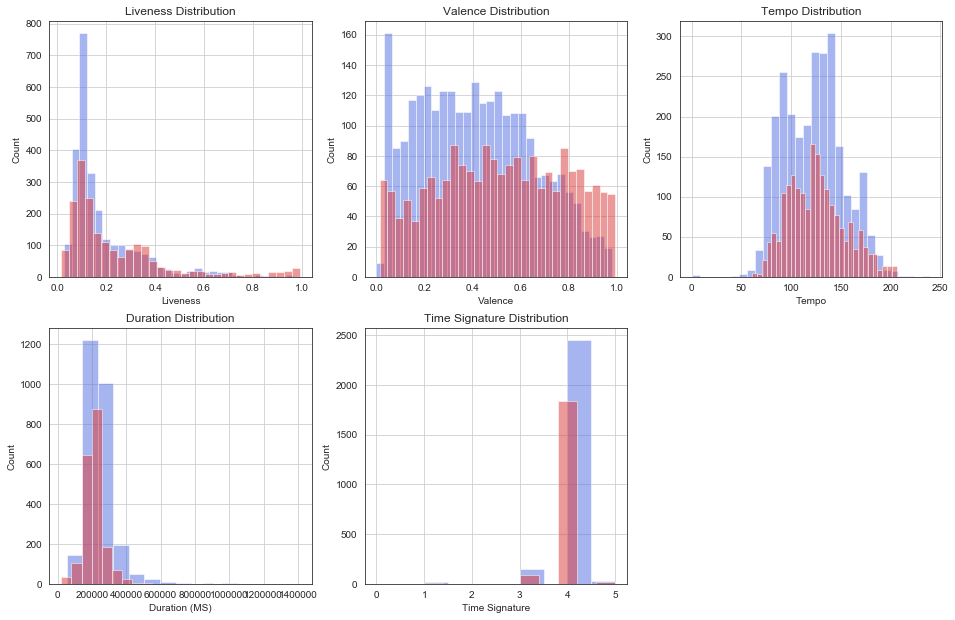

In [9]:
fig = plt.figure(figsize=(16, 16))

# Popularity
ax1 = fig.add_subplot(3,3,1)
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Count')
ax1.set_title('Popularity Distribution')
pos_popularity.hist(alpha=0.5, bins=30)
ax2 = fig.add_subplot(3,3,1)
neg_popularity.hist(alpha=0.5, bins=30)

# Danceability
ax3 = fig.add_subplot(3,3,2)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Danceability Distribution')
pos_danceability.hist(alpha=0.5, bins=30)
ax4 = fig.add_subplot(3,3,2)
neg_danceability.hist(alpha=0.5, bins=30)

# Energy
ax5 = fig.add_subplot(3,3,3)
ax5.set_xlabel('Energy')
ax5.set_ylabel('Count')
ax5.set_title('Energy Distribution')
pos_energy.hist(alpha=0.5, bins=30)
ax6 = fig.add_subplot(3,3,3)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax7 = fig.add_subplot(3,3,4)
ax7.set_xlabel('Key')
ax7.set_ylabel('Count')
ax7.set_title('Key Distribution')
pos_key.hist(alpha=0.5, bins=12)
ax8 = fig.add_subplot(3,3,4)
neg_key.hist(alpha=0.5, bins=12)

# Loudness
ax9 = fig.add_subplot(3,3,5)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Loudness Distribution')
pos_loudness.hist(alpha=0.5, bins=30)
ax10 = fig.add_subplot(3,3,5)
neg_loudness.hist(alpha=0.5, bins=30)

# Mode
ax11 = fig.add_subplot(3,3,6)
ax11.set_xlabel('Mode')
ax11.set_ylabel('Count')
ax11.set_title('Mode Distribution')
pos_mode.hist(alpha=0.5, bins=2)
ax12 = fig.add_subplot(3,3,6)
neg_mode.hist(alpha=0.5, bins=2)

# Speechiness
ax13 = fig.add_subplot(3,3,7)
ax13.set_xlabel('Speechiness')
ax13.set_ylabel('Count')
ax13.set_title('Speechiness Distribution')
pos_speechiness.hist(alpha=0.5, bins=30)
ax14 = fig.add_subplot(3,3,7)
neg_speechiness.hist(alpha=0.5, bins=30)

# Acousticness
ax15 = fig.add_subplot(3,3,8)
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title('Acousticness Distribution')
pos_acousticness.hist(alpha=0.5, bins=30)
ax16 = fig.add_subplot(3,3,8)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig.add_subplot(3,3,9)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Instrumentalness Distribution')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax18 = fig.add_subplot(3,3,9)
neg_instrumentalness.hist(alpha=0.5, bins=30)

fig2 = plt.figure(figsize=(16, 16))

# Liveness
ax19 = fig2.add_subplot(3,3,1)
ax19.set_xlabel('Liveness')
ax19.set_ylabel('Count')
ax19.set_title('Liveness Distribution')
pos_liveness.hist(alpha=0.5, bins=30)
ax20 = fig2.add_subplot(3,3,1)
neg_liveness.hist(alpha=0.5, bins=30)

# Valence
ax21 = fig2.add_subplot(3,3,2)
ax21.set_xlabel('Valence')
ax21.set_ylabel('Count')
ax21.set_title('Valence Distribution')
pos_valence.hist(alpha=0.5, bins=30)
ax22 = fig2.add_subplot(3,3,2)
neg_valence.hist(alpha=0.5, bins=30)

# Tempo
ax23 = fig2.add_subplot(3,3,3)
ax23.set_xlabel('Tempo')
ax23.set_ylabel('Count')
ax23.set_title('Tempo Distribution')
pos_tempo.hist(alpha=0.5, bins=30)
ax24 = fig2.add_subplot(3,3,3)
neg_tempo.hist(alpha=0.5, bins=30)

# Duration (MS)
ax25 = fig2.add_subplot(3,3,4)
ax25.set_xlabel('Duration (MS)')
ax25.set_ylabel('Count')
ax25.set_title('Duration Distribution')
pos_duration_ms.hist(alpha=0.5, bins=15)
ax26 = fig2.add_subplot(3,3,4)
neg_duration_ms.hist(alpha=0.5, bins=15)

# Time SIgnature
ax25 = fig2.add_subplot(3,3,5)
ax25.set_xlabel('Time Signature')
ax25.set_ylabel('Count')
ax25.set_title('Time Signature Distribution')
pos_time_signature.hist(alpha=0.5, bins=10)
ax26 = fig2.add_subplot(3,3,5)
neg_time_signature.hist(alpha=0.5, bins=10)

Refences: Wes Doyle